In [49]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets
%matplotlib inline
import matplotlib as mpl

In [31]:
corrected_data_path = "Resources3/FullDataSet.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,Date,Month Abbr,State,Number of Flights,Positive,Deaths,Total Tested
0,2020-08-24,Aug,Arizona,494,198414,4771,1155629
1,2020-08-24,Aug,California,1998,668615,12152,10652487
2,2020-08-24,Aug,Colorado,941,55143,1815,938596
3,2020-08-24,Aug,Florida,917,602829,10534,4447156
4,2020-08-24,Aug,Georgia,2166,256253,5156,2205181
...,...,...,...,...,...,...,...
1135,2020-10-22,Oct,Pennsylvania,274,188360,8592,2373439
1136,2020-10-22,Oct,Texas,2067,845100,17286,7532717
1137,2020-10-22,Oct,Utah,297,99549,563,1004286
1138,2020-10-22,Oct,Virginia,396,170104,3524,2451698


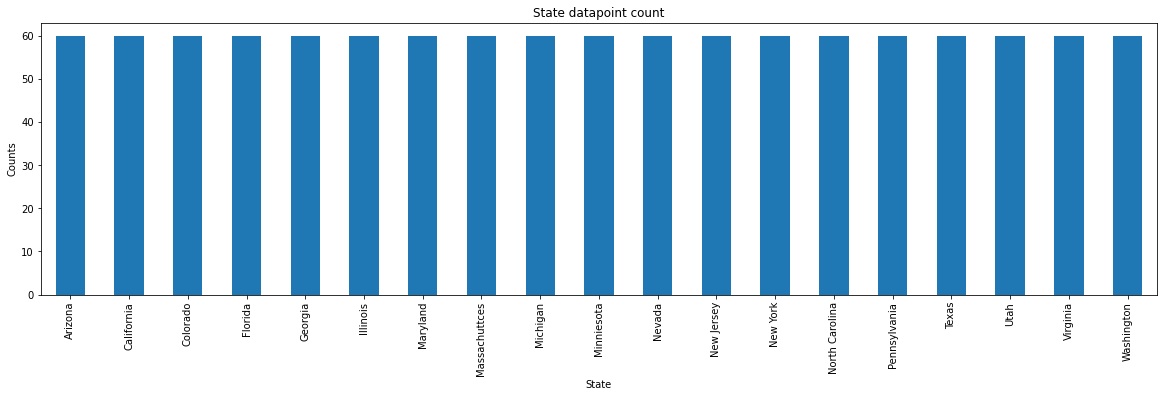

In [32]:
#total number of datapoint per state (to check the number of data points are fairly simimral )
state_gb = corrected_data_df.groupby(["State"])
count_st = state_gb.count()["Total Tested"]
count_chart= count_st.plot(kind= "bar", figsize=(20,5))
plt.title("State datapoint count")
count_chart.set_ylabel("Counts")
plt.show()

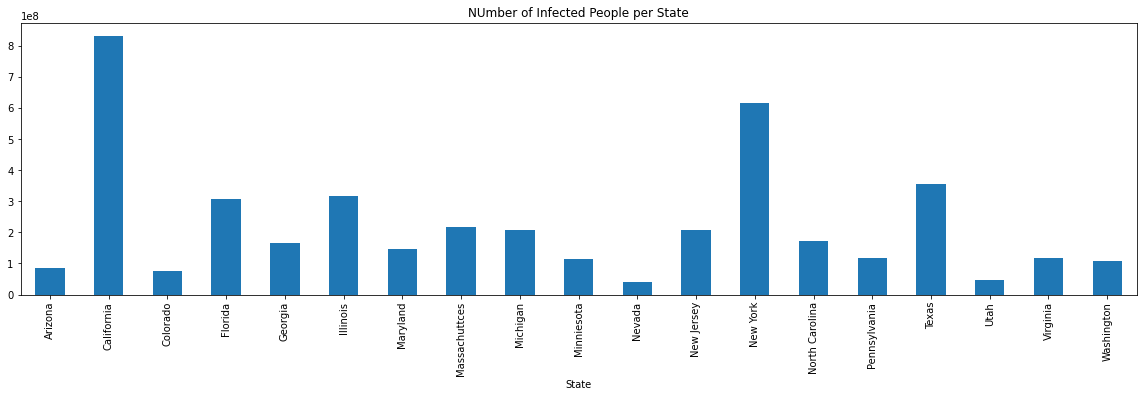

In [33]:
#total number of infected people per state in a year
state_gb = corrected_data_df.groupby(["State"])
state_count = state_gb.sum()["Total Tested"]
state_count.head(12)
count_chart = state_count.plot(kind = "bar", figsize= (20,5))
plt.title("NUmber of Infected People per State")
plt.show()

In [34]:
infected_groups = corrected_data_df.groupby(["State", "Month Abbr"])
sum_it_up = infected_groups.sum()
sum_it_up.head(15)

Number of Flights  Positive  Deaths  Total Tested
State      Month Abbr                                                   
Arizona    Aug                      3761   1602726   39432       9428310
           Oct                     10715   4977569  126862      34483635
           Sep                     13015   6319710  161364      39968537
California Aug                     15458   5491029  100728      87891566
           Oct                     39250  18635891  363874     353996307
           Sep                     53132  22856989  435369     390874484
Colorado   Aug                      6976    449657   14664       7761001
           Oct                     18915   1727963   44122      34039627
           Sep                     22788   1883372   56958      34568618
Florida    Aug                      7104   4908910   88076      36261897
           Oct                     20875  16193977  342127     122450042
           Sep                     23950  20108476  390532     149613628
Georgia    Aug                     15694   2110845   43405      18224056
           Oct                     46489   7303564  162976      69513132
           Sep                     57426   8925277  192621      79647001

what state?California


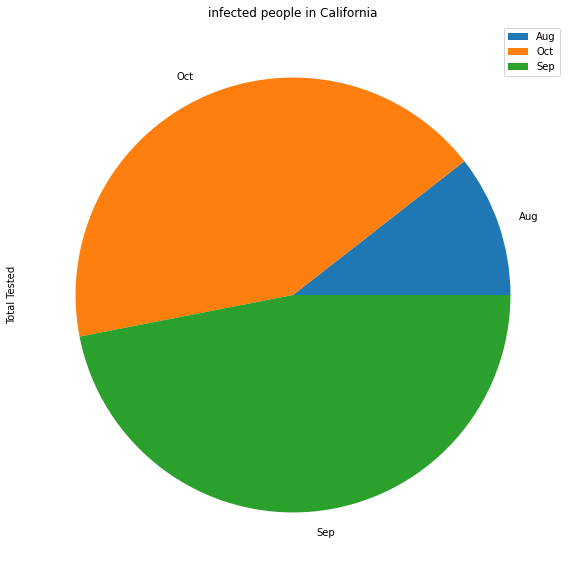

In [35]:
#just one state monthly

state_name = input("what state?")
#state_code = "CA"
just_one_state = sum_it_up.loc[state_name]
state_pie = just_one_state.plot(kind ="pie", y= "Total Tested", title= ("infected people in " + state_name), figsize= (10,10))
state_pie.set_ylabel("Total Tested")

plt.show()
#plt.axis("equal")

In [36]:
reduced_data = corrected_data_df[["State", "Month Abbr", "Total Tested"]]
reduced_data
month_list = reduced_data["Month Abbr"].unique()
month_list
state_list = reduced_data["State"].unique()
state_list
month_gb = reduced_data.groupby(["Month Abbr"])
sum_month = month_gb.sum()
sum_month.head

<bound method NDFrame.head of             Total Tested
Month Abbr              
Aug            444584624
Oct           1823406585
Sep           1983734649>

In [37]:
#which month has the highest number of infected people
reduced_data


,State,Month Abbr,Total Tested
0,Arizona,Aug,1155629
1,California,Aug,10652487
2,Colorado,Aug,938596
3,Florida,Aug,4447156
4,Georgia,Aug,2205181
...,...,...,...
1135,Pennsylvania,Oct,2373439
1136,Texas,Oct,7532717
1137,Utah,Oct,1004286
1138,Virginia,Oct,2451698


In [38]:
reduced_data.pivot_table("Total Tested", index= "State", columns= "Month Abbr", aggfunc ="sum")


Month Abbr,Aug,Oct,Sep
State,,,
Arizona,9428310,34483635,39968537
California,87891566,353996307,390874484
Colorado,7761001,34039627,34568618
Florida,36261897,122450042,149613628
Georgia,18224056,69513132,79647001
Illinois,31219388,139550735,145966337
Maryland,14885349,63811643,68203634
Massachuttces,18129234,104901020,95370033
Michigan,21282225,89226865,96287858


In [48]:
state_list

array(['Arizona', 'California', 'Colorado', 'Florida', 'Georgia',
       'Illinois', 'Maryland', 'Massachuttces', 'Michigan', 'Minniesota',
       'Nevada', 'New Jersey', 'New York', 'North Carolina',
       'Pennsylvania', 'Texas', 'Utah', 'Virginia', 'Washington'],
      dtype=object)

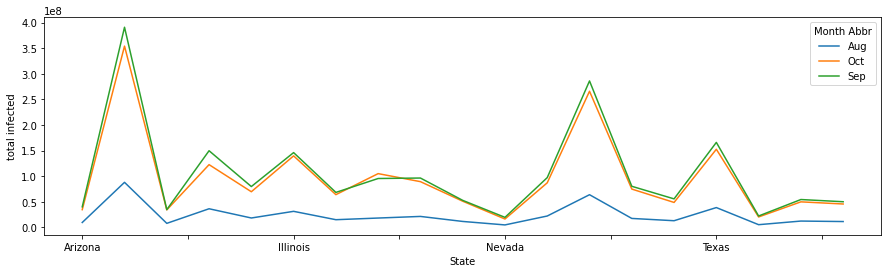

In [59]:

reduced_data.pivot_table("Total Tested", index= "State", columns= "Month Abbr", aggfunc ="sum").plot(figsize=(15, 4))  
#fig, ax = plt.subplots(figsize=(12, 4))
#plt.gca().set_xticklabels(['Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Maryland', 'Massachuttces', 'Michigan', 'Minniesota', 'Nevada', 'New Jersey', 'New York', 'North Carolina','Pennsylvania', 'Texas', 'Utah', 'Virginia', 'Washington'])
plt.ylabel('total infected');

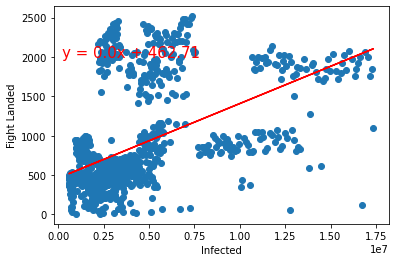

In [15]:
infected_values = corrected_data_df["Total Tested"]
flights_values = corrected_data_df["Number of Flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(200000,2000),fontsize=15,color="red")
plt.xlabel('Infected')
plt.ylabel('Fight Landed')
plt.show()

In [11]:
correlation = st.pearsonr(corrected_data_df["Total Tested"], corrected_data_df["Number of Flights"])
print(correlation)

(0.5112001703940012, 6.514661856282044e-77)
